Chelsea Jaculina

DATA 255 Assignment #2

September 22, 2025

## Import Required Libraries

In [229]:
import csv # library to read csv files
import torch # PyTorch to store numbers and perform math operations
import matplotlib.pyplot as plt # to plot and visualize images

## Display the Sample Images

Load MNIST CSV files

In [230]:
def load_mnist_csv(filename, num_samples=None):
    data = [] # list to store label and pixels as tuples
    with open(filename, 'r') as f: # open csv file on read
        reader = csv.reader(f)
        next(reader)  # skip header
        for i, row in enumerate(reader):
            if num_samples and i >= num_samples: # if a sample limit is provide, stop loop through each row in file
                break
            row = list(map(int, row)) # convert all string values to integers in row
            label = row[0] # first row is the label (0 or 1)
            pixels = row[1:] # remaining 784 values are the pixel values for image
            data.append((label, pixels)) # store the label and pixel as a tuple in list
    return data

In [231]:
# load training data from csv file
train_samples = load_mnist_csv("/content/drive/MyDrive/MSDA 2024-2026/04 Fall 2025/DATA 255 - Deep Learning/mnist_train_binary.csv")

# load test data from csv file
test_samples  = load_mnist_csv("/content/drive/MyDrive/MSDA 2024-2026/04 Fall 2025/DATA 255 - Deep Learning/mnist_test_binary.csv")

print(f"Loaded {len(train_samples)} training samples successfully")
print(f"Loaded {len(test_samples)} test samples successfully")


Loaded 11339 training samples successfully
Loaded 1850 test samples successfully


Load the dataset from the csv files and display the sample images as shown in Fig.1.

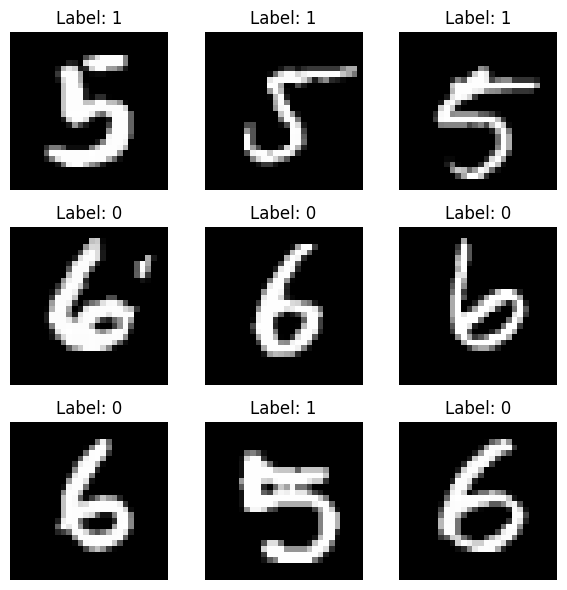

In [232]:
plt.figure(figsize=(6, 6))
for i, (label, pixels) in enumerate(train_samples[:9]):
    image = torch.tensor(pixels, dtype=torch.float32).reshape(28, 28)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")
plt.tight_layout()
plt.show()

##1. Build Neural Network

In [233]:
# define sigmoid function from scratch
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# define ReLU activation function from scratch
def relu(z):
    return torch.maximum(torch.zeros_like(z), z)

In [234]:
input_size = 784 # number of input neurons (28 * 28)
hidden_size = 100 # number of hidden layer neurons
output_size = 1 # # number of output neurons (binary classification: 0 or 1)

In [235]:
# Set seed for reproducibility
torch.manual_seed(0)  # required by assignment

# --- He Initialization for ReLU hidden layer (w1) ---
w1 = torch.randn((hidden_size, input_size), dtype=torch.float32, requires_grad=True) * (
    (2 ** 0.5) / ((input_size + hidden_size) ** 0.5)
)

# --- Xavier Initialization for Sigmoid output layer (w2) ---
w2 = torch.randn((output_size, hidden_size), dtype=torch.float32, requires_grad=True) * (
    2) / ((hidden_size + output_size) ** 0.5)


# --- Biases ---
# Bias for each of the 100 hidden layer neurons
b1 = 0

# Bias for the output neuron
b2 = 0

# Confirm shapes
print("Weight matrix from input layer to hidden layer: ", w1.shape)
print("Weight matrix from hidden layer to output layer:", w2.shape)

Weight matrix from input layer to hidden layer:  torch.Size([100, 784])
Weight matrix from hidden layer to output layer: torch.Size([1, 100])


In [236]:
# define forward feed pass function
def forward(x):
    # set linear transformation from input layer to hidden layer
    z1 = x @ w1.T + b1

    # apply reLU activation to hidden layer output
    a1 = relu(z1) # hidden layer activation

    # set linear transformation from hidden layer to output layer
    z2 = a1 @ w2.T + b2

    # apply sigmoid activation to get output layer activiation
    a2 = sigmoid(z2)

    return a1, a2

print("Neural network successfully initialized with weights.")

Neural network successfully initialized with weights.


## 2. Calculate Loss & Accuracy

In [237]:
batch_pixels = [] # list for pixels
batch_labels = [] # list for labels

# use the first 64 samples from training data set
for label, pixels in train_samples[:64]:
    # convert the list of 784 pixel values and normalize them to [0, 1] to train faster and for more stability
    batch_pixels.append(torch.tensor(pixels, dtype=torch.float32) / 255.0)

    # convert the label (0 or 1) to a shape of 1
    batch_labels.append(torch.tensor([label], dtype=torch.float32))

x = torch.stack(batch_pixels)
y = torch.stack(batch_labels)

print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

x shape: torch.Size([64, 784])
y shape: torch.Size([64, 1])


In [238]:
# perform a forward pass to compute activation for hidden layer (a1) and output layer (a2)
a1, a2 = forward(x)

In [239]:
# x: 64 images, each flattened to 784 pixel values (28x28)
print(f"Input batch x shape: {x.shape}")  # [64, 784]

# w1: weights connecting 784 input pixels to 100 hidden units
print(f"W1 shape: {w1.shape}")  # [784, 100]

# a1: hidden layer output after sigmoid, one row per image
print(f"Hidden layer a1 shape: {a1.shape}")  # [64, 100]

# w2: weights from 100 hidden units to 1 output unit
print(f"W2 shape: {w2.shape}")  # [100, 1]

# a2: final output — one sigmoid value per image
print(f"Output layer a2 shape: {a2.shape}")  # [64, 1]

Input batch x shape: torch.Size([64, 784])
W1 shape: torch.Size([100, 784])
Hidden layer a1 shape: torch.Size([64, 100])
W2 shape: torch.Size([1, 100])
Output layer a2 shape: torch.Size([64, 1])


2-1. Calculate the following binary cross entropy loss for the first 64 samples from the train set and print it out.

In [240]:
# 2-1. Binary Cross-Entropy Loss
def binary_cross_entropy(y_hat, y_true):
    epsilon = 1e-10  # prevent log(0)
    return -torch.mean(y_true * torch.log(y_hat + epsilon) + (1 - y_true) * torch.log(1 - y_hat + epsilon))

loss = binary_cross_entropy(a2, y)
print(f"\nBinary Cross-Entropy Loss for first 64 samples: {loss.item():.3f}")  # expected ~0.704


Binary Cross-Entropy Loss for first 64 samples: 0.704


2-2. Calculate accuracy for the first 64 samples from the train set and print it out.

In [241]:
# 2-2. Accuracy
predictions = (a2 >= 0.5).float()
accuracy = (predictions == y).float().mean()
print(f"Accuracy for first 64 samples: {accuracy.item():.3f}")  # expected ~0.547

Accuracy for first 64 samples: 0.547
